# Análisis Exploratorio de datos

### Objetivo
El objetivo de este notebook es realizar un Análisis Exploratorio de Datos (EDA) visual para descubrir y validar las relaciones entre las variables predictoras (features) y las variables objetivo (targets).

Este análisis es fundamental para confirmar qué features meteorológicas, tanto puntuales como de media móvil, tienen el mayor poder para separar las distintas clases de toxicidad.

### Metodología
**Carga y Unión**: Se cargan los datos limpios de toxinas (el target) y los datos meteorológicos enriquecidos (las features con medias móviles). Se unen en un único DataFrame usando la Fecha como clave.

**Generación de Targets Binarios**: A partir de la variable multiclase Resultado_cat (0, 1, 2), se crean las dos variables binarias que se usarán en el modelo jerárquico:

- PresenciaToxina (0 o 1)

- Peligrosidad (0 o 1)

**Visualización en Grilla**: Se genera un bucle para crear una grilla de gráficos (4 por fila) que compara la distribución de cada una de las 54 features contra las variables target (Resultado_cat, PresenciaToxina y Peligrosidad) mediante:

**Boxplots**: Para comparar medianas y rangos entre clases.

**Gráficos de Densidad (KDE)**: Para visualizar la forma y superposición de las distribuciones de cada clase.

Importacion de las bibliotecas necesarias

In [1]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt


Lectura datos toxicológicos

In [2]:
df_toxinas = pd.read_excel("completo_TPM.xlsx")
df_toxinas.head()

Fecha  Resultado_cat
0 2021-01-01              0
1 2021-01-02              0
2 2021-01-03              0
3 2021-01-04              0
4 2021-01-05              0

Lectura datos meteorológicos

In [3]:
df_meteorologicos = pd.read_csv("POWER_LARC_unido.csv")
df_meteorologicos.head()

Fecha  T2M_MIN  QV2M   RH2M  PRECTOTCORR     PS  WS10M  WS10M_MAX  \
0  2021-01-01     9.87  7.50  81.35         1.92  97.00   7.16      10.23   
1  2021-01-02     7.21  5.38  66.48         0.10  96.55  10.71      13.00   
2  2021-01-03     4.99  4.84  74.74         1.95  97.43   7.42       9.42   
3  2021-01-04     4.04  4.95  77.54         2.11  98.45   7.79       9.16   
4  2021-01-05     5.60  5.70  74.94         0.17  98.60   6.30       7.91   

   WS10M_MIN  WS10M_RANGE  ...  ALLSKY_KT_MA_14d  WS2M_MA_14d  \
0       3.44         6.79  ...          0.453571     4.992857   
1       6.44         6.56  ...          0.447857     5.071429   
2       6.07         3.35  ...          0.470714     5.375714   
3       6.03         3.13  ...          0.489286     5.286429   
4       3.00         4.91  ...          0.480000     5.231429   

   PRECTOTCORR_SUM_14d  T2M_MA_30d  T2M_MAX_MA_30d  T2M_MIN_MA_30d  \
0                20.84    7.697333       10.917000           4.662   
1                21.65    7.982667       11.158667           4.950   
2                19.22    8.227333       11.424000           5.168   
3                19.61    8.225333       11.403333           5.216   
4                21.06    8.123000       11.311333           5.094   

   ALLSKY_SFC_PAR_TOT_MA_30d  ALLSKY_KT_MA_30d  WS2M_MA_30d  \
0                   2.425767          0.440333     5.260667   
1                   2.400390          0.434333     5.214000   
2                   2.427117          0.439000     5.225000   
3                   2.429877          0.439667     5.185000   
4                   2.440747          0.442000     5.180667   

   PRECTOTCORR_SUM_30d  
0                64.36  
1                63.18  
2                60.53  
3                61.94  
4                62.60  

[5 rows x 55 columns]

Union de ambos dataframes mediante la columna Fecha

In [4]:
df_toxinas["Fecha"] = pd.to_datetime(df_toxinas["Fecha"])
df_meteorologicos["Fecha"] = pd.to_datetime(df_meteorologicos["Fecha"])

df_unido = pd.merge(df_toxinas, df_meteorologicos, on="Fecha", how="inner")
df_unido.head()

Fecha  Resultado_cat  T2M_MIN  QV2M   RH2M  PRECTOTCORR     PS  WS10M  \
0 2021-01-01              0     9.87  7.50  81.35         1.92  97.00   7.16   
1 2021-01-02              0     7.21  5.38  66.48         0.10  96.55  10.71   
2 2021-01-03              0     4.99  4.84  74.74         1.95  97.43   7.42   
3 2021-01-04              0     4.04  4.95  77.54         2.11  98.45   7.79   
4 2021-01-05              0     5.60  5.70  74.94         0.17  98.60   6.30   

   WS10M_MAX  WS10M_MIN  ...  ALLSKY_KT_MA_14d  WS2M_MA_14d  \
0      10.23       3.44  ...          0.453571     4.992857   
1      13.00       6.44  ...          0.447857     5.071429   
2       9.42       6.07  ...          0.470714     5.375714   
3       9.16       6.03  ...          0.489286     5.286429   
4       7.91       3.00  ...          0.480000     5.231429   

   PRECTOTCORR_SUM_14d  T2M_MA_30d  T2M_MAX_MA_30d  T2M_MIN_MA_30d  \
0                20.84    7.697333       10.917000           4.662   
1                21.65    7.982667       11.158667           4.950   
2                19.22    8.227333       11.424000           5.168   
3                19.61    8.225333       11.403333           5.216   
4                21.06    8.123000       11.311333           5.094   

   ALLSKY_SFC_PAR_TOT_MA_30d  ALLSKY_KT_MA_30d  WS2M_MA_30d  \
0                   2.425767          0.440333     5.260667   
1                   2.400390          0.434333     5.214000   
2                   2.427117          0.439000     5.225000   
3                   2.429877          0.439667     5.185000   
4                   2.440747          0.442000     5.180667   

   PRECTOTCORR_SUM_30d  
0                64.36  
1                63.18  
2                60.53  
3                61.94  
4                62.60  

[5 rows x 56 columns]

Creación de las columnas binarias de Presencia y Peligrosidad

In [5]:
# Crear columna PresenciaToxina: 1 si hay toxina (clase 1 o 2), 0 si no hay (clase 0)
df_unido["PresenciaToxina"] = df_unido["Resultado_cat"].apply(lambda x: 0 if x == 0 else 1)

# Crear columna Peligrosidad: 1 si supera el límite (clase 2), 0 si no (clase 0 o 1)
df_unido["Peligrosidad"] = df_unido["Resultado_cat"].apply(lambda x: 1 if x == 2 else 0)

Listado de las variables a graficar

In [6]:
features_list = df_unido.columns.drop([
    'Fecha', 
    'Resultado_cat',
    'PresenciaToxina',
    'Peligrosidad' 
])

target = "Resultado_cat"
print(f"Se plotearán {len(features_list)} features.")

Se plotearán 54 features.


Creación de los graficos boxplot de cada variable segun la categoría de resultado

Generando grid de boxplots...


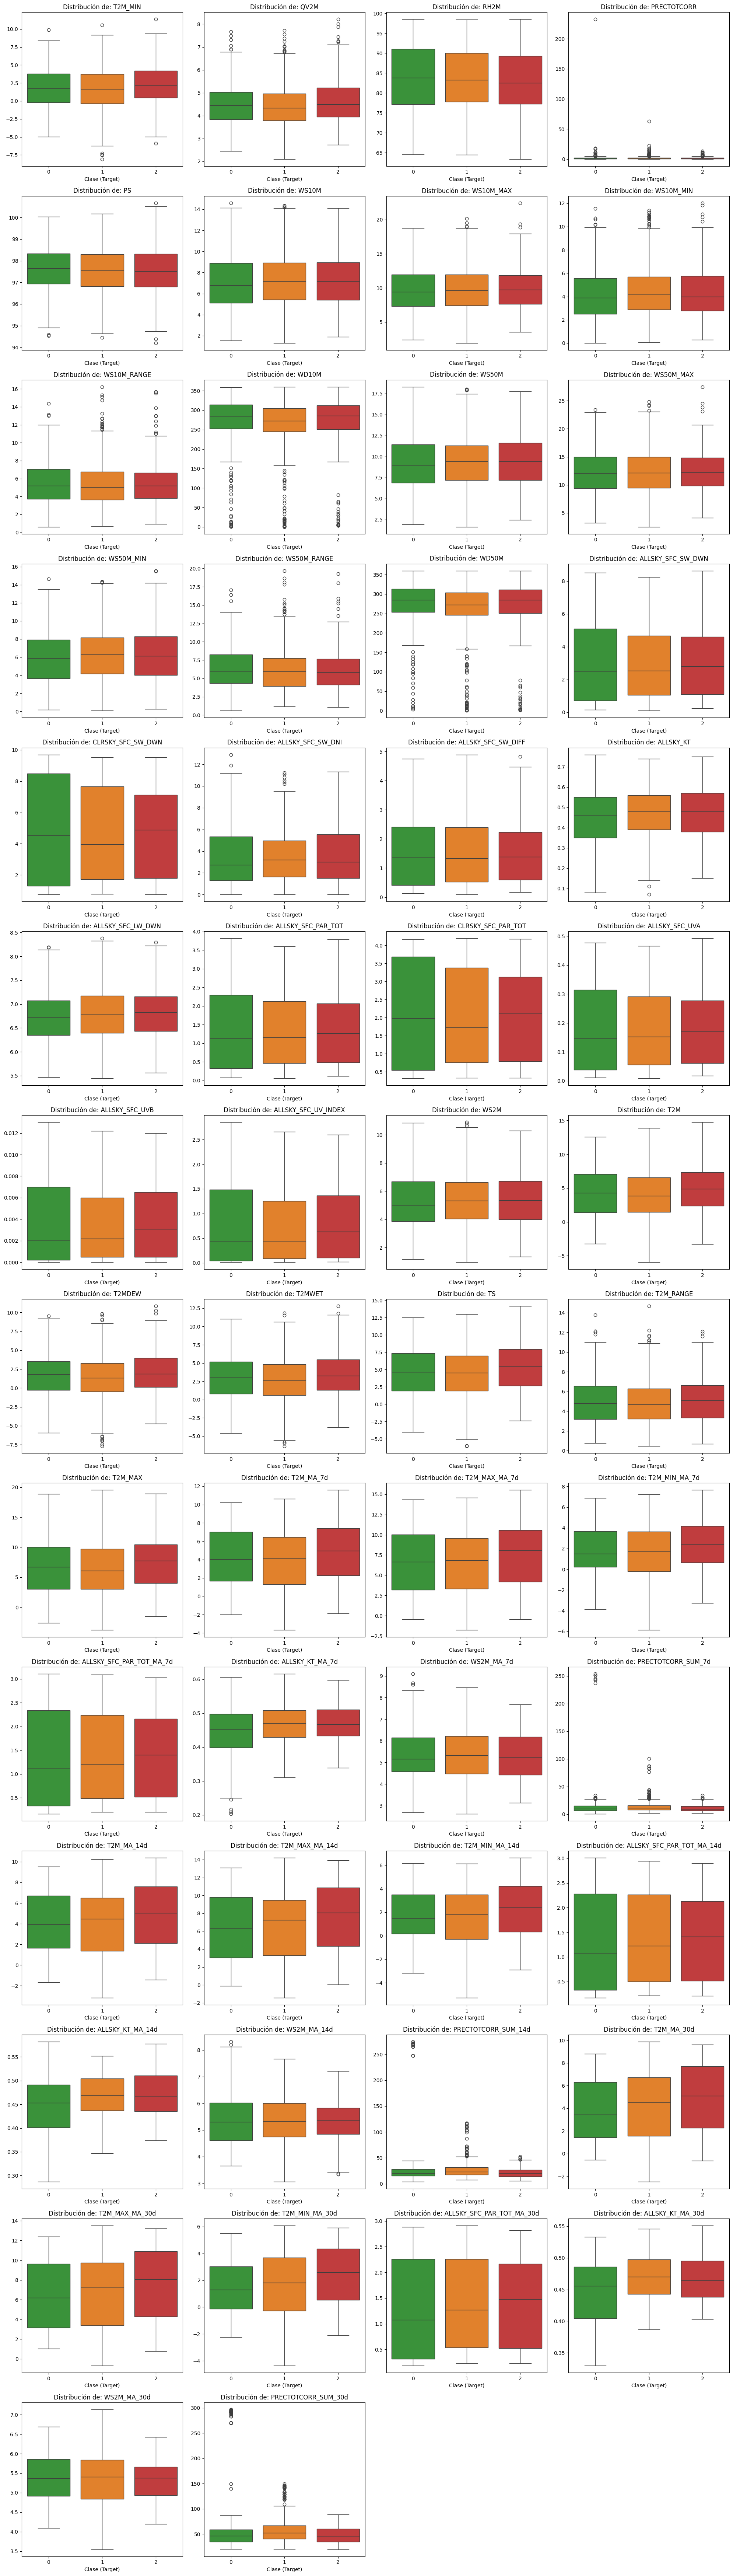

In [7]:
# 0 = Sin Toxina (Verde), 1 = Leve (Naranja), 2 = Peligrosa (Rojo)
colores_target = {
    0: "#2ca02c",  # Verde
    1: "#ff7f0e",  # Naranja
    2: "#d62728"   # Rojo
}

cols = 4
filas = math.ceil(len(features_list) / cols)

print("Generando grid de boxplots...")
fig, axs = plt.subplots(filas, cols, figsize=(20, 5 * filas))

axs = axs.flatten()

for i, feature in enumerate(features_list):
    ax = axs[i]
    sns.boxplot(
        data=df_unido,
        x=target, 
        y=feature,
        hue=target,
        legend=False, 
        ax=ax,
        palette=colores_target
    )
    ax.set_title(f'Distribución de: {feature}')
    ax.set_xlabel('Clase (Target)') 
    ax.set_ylabel(None) 

for i in range(len(features_list), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

Creación de los graficos de densidad de cada variable segun la categoría de resultado

Generando grid de Gráficos de Densidad...


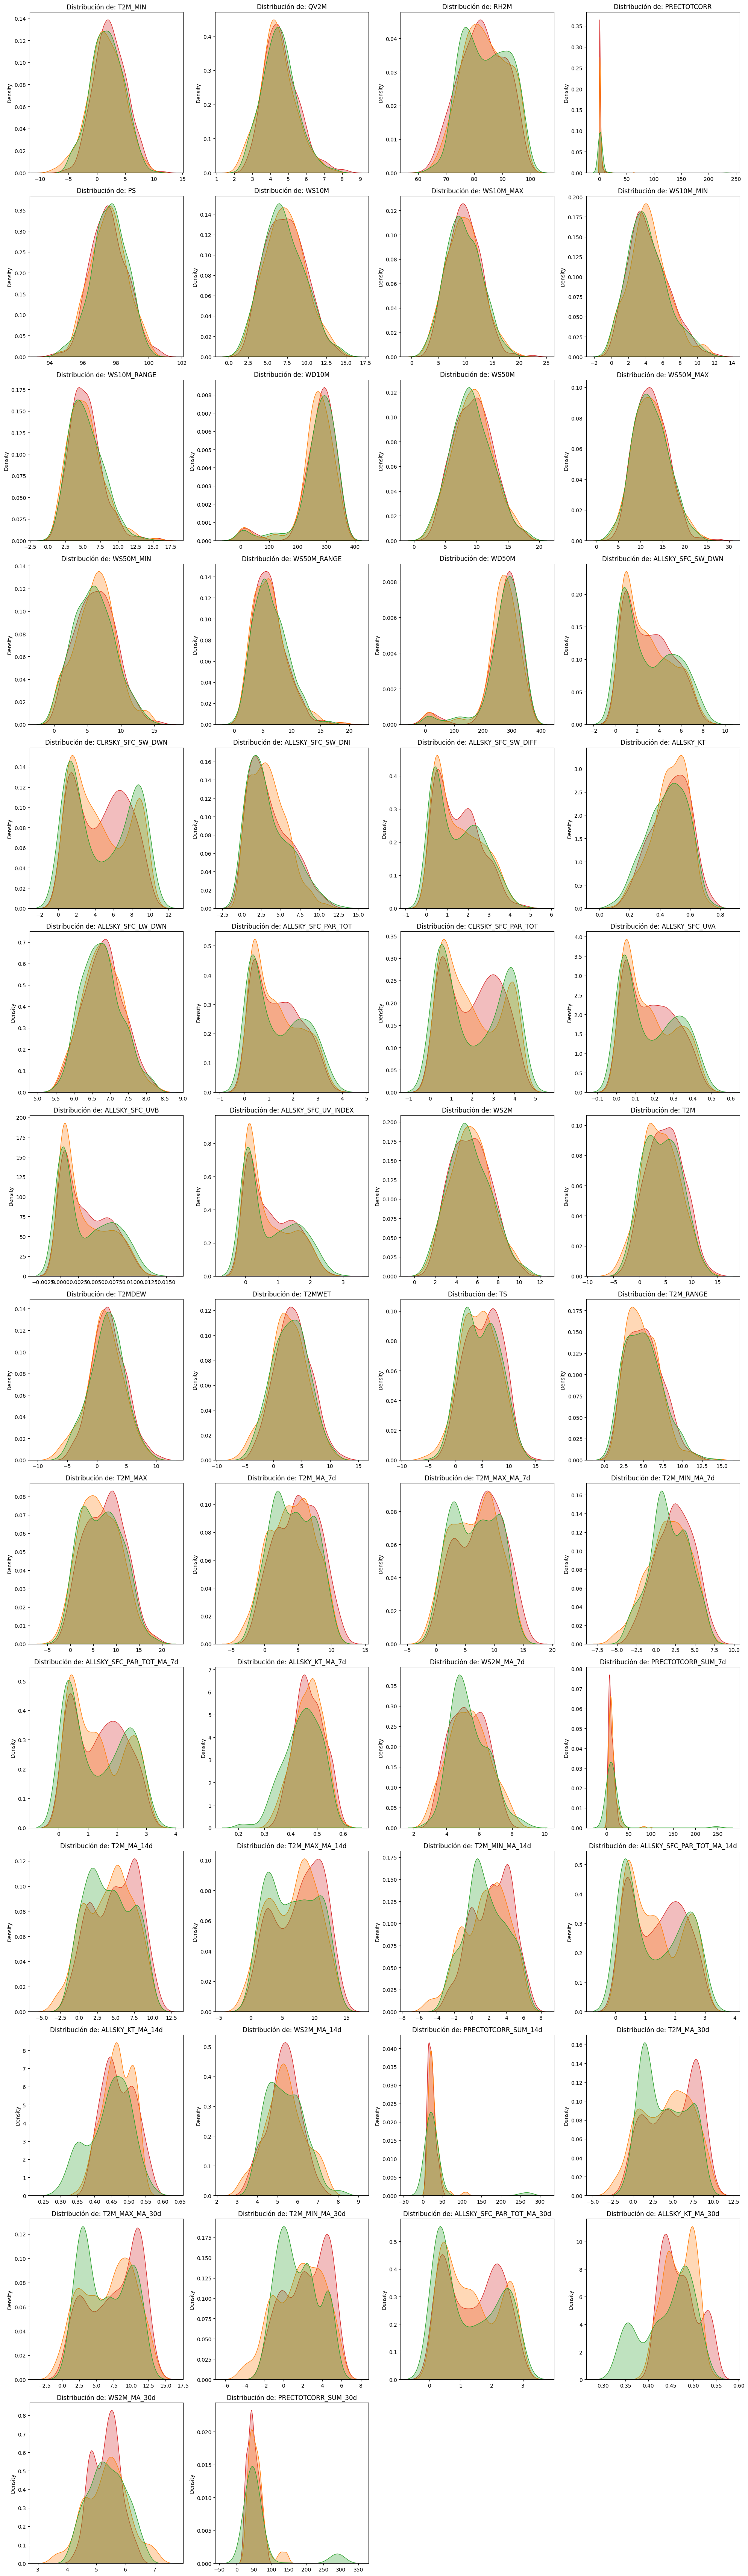

In [8]:
cols = 4
filas = math.ceil(len(features_list) / cols)

print("Generando grid de Gráficos de Densidad...")
fig, axs = plt.subplots(filas, cols, figsize=(20, 5 * filas))
axs = axs.flatten()

handles, labels = None, None

for i, feature in enumerate(features_list):
    ax = axs[i]
    sns.kdeplot(
        data=df_unido, 
        x=feature, 
        hue=target,
        fill=True, 
        common_norm=False, 
        palette=colores_target,
        alpha=0.3,
        ax=ax,
        legend=False
    )
    ax.set_title(f'Distribución de: {feature}')
    ax.set_xlabel(None)
    
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

for i in range(len(features_list), len(axs)):
    axs[i].axis('off')

if handles:
    fig.legend(
        handles, 
        labels, 
        loc='upper center',        
        bbox_to_anchor=(0.5, 1.0), 
        ncol=len(labels),          
        title="Clase"
    )

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Creación de los graficos boxplot de cada variable segun la presencia de toxina

Generando grid de boxplots...


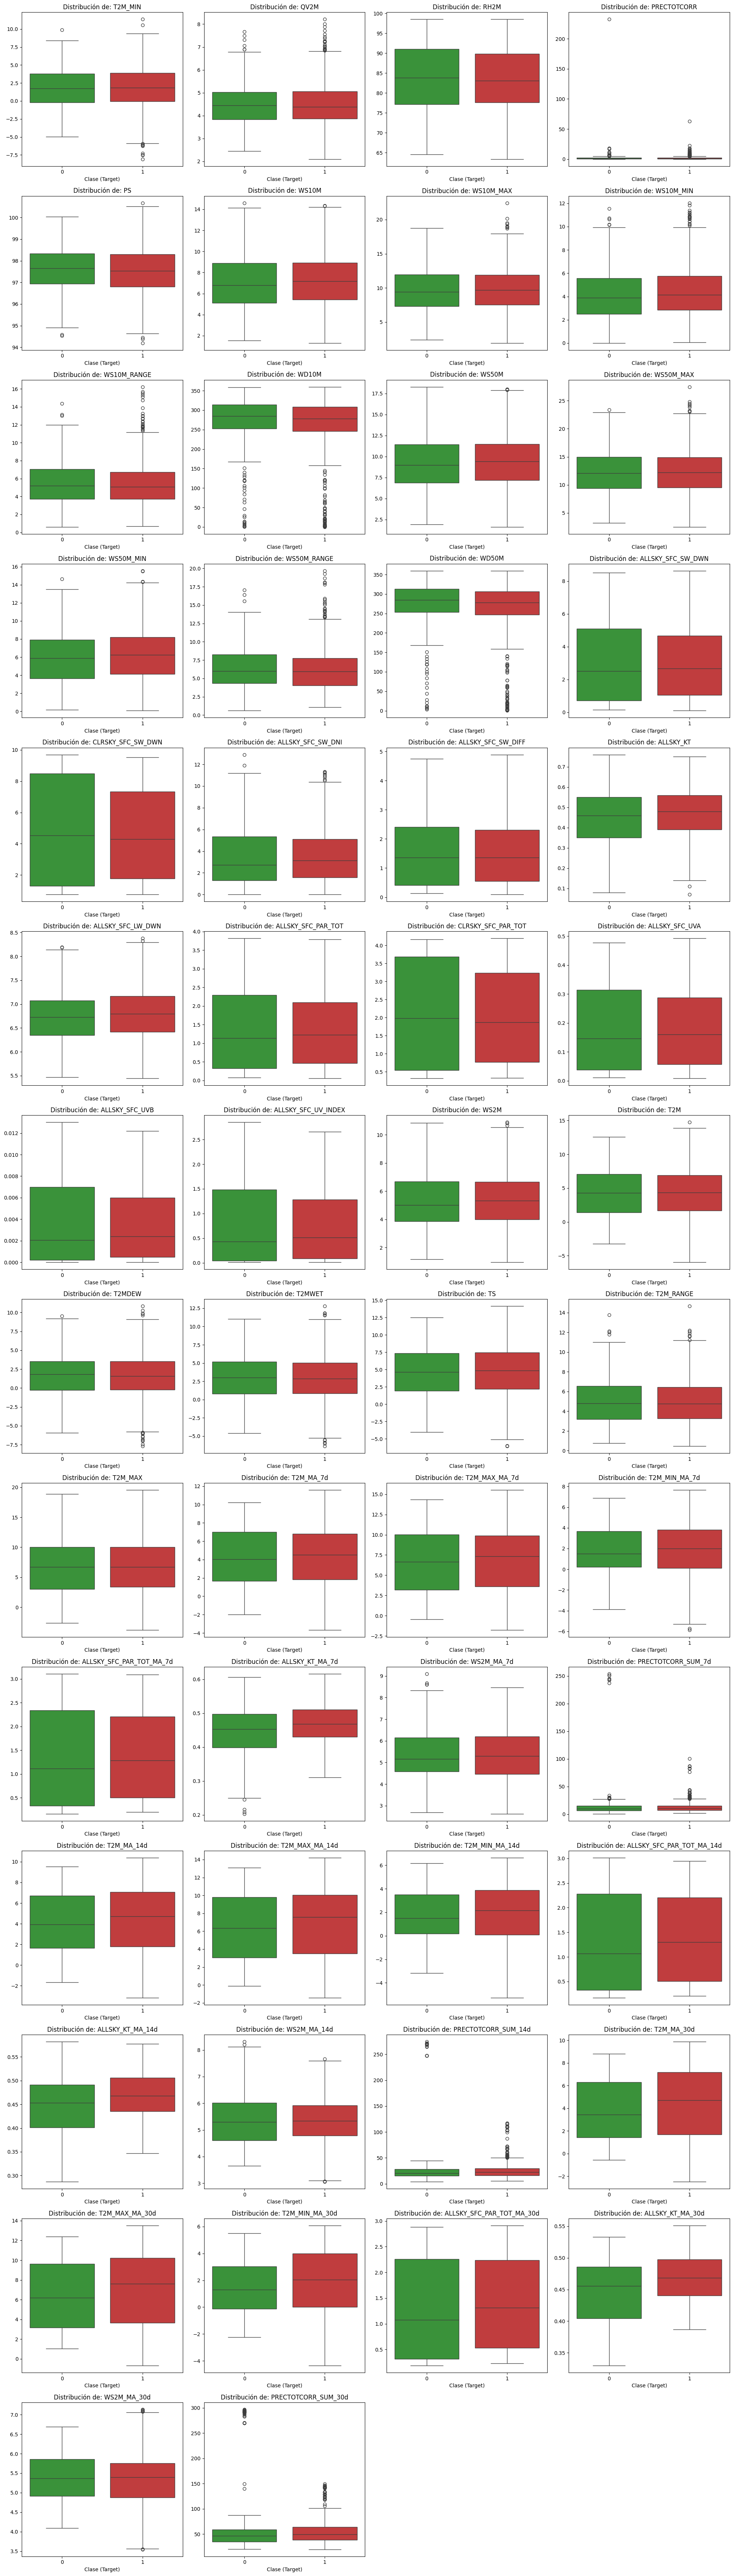

In [9]:
target = "PresenciaToxina"

# 0 = Sin Toxina (Verde), 1 = Con toxina (Rojo)
colores_target = {
    0: "#2ca02c",  # Verde
    1: "#d62728"   # Rojo
}

cols = 4
filas = math.ceil(len(features_list) / cols)

print("Generando grid de boxplots...")
fig, axs = plt.subplots(filas, cols, figsize=(20, 5 * filas))

axs = axs.flatten()

for i, feature in enumerate(features_list):
    ax = axs[i]
    sns.boxplot(
        data=df_unido,
        x=target, 
        y=feature,
        hue=target,
        legend=False, 
        ax=ax,
        palette=colores_target
    )
    ax.set_title(f'Distribución de: {feature}')
    ax.set_xlabel('Clase (Target)') 
    ax.set_ylabel(None) 

for i in range(len(features_list), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

Creación de los graficos de densidad de cada variable segun la presencia de toxina

Generando grid de Gráficos de Densidad...


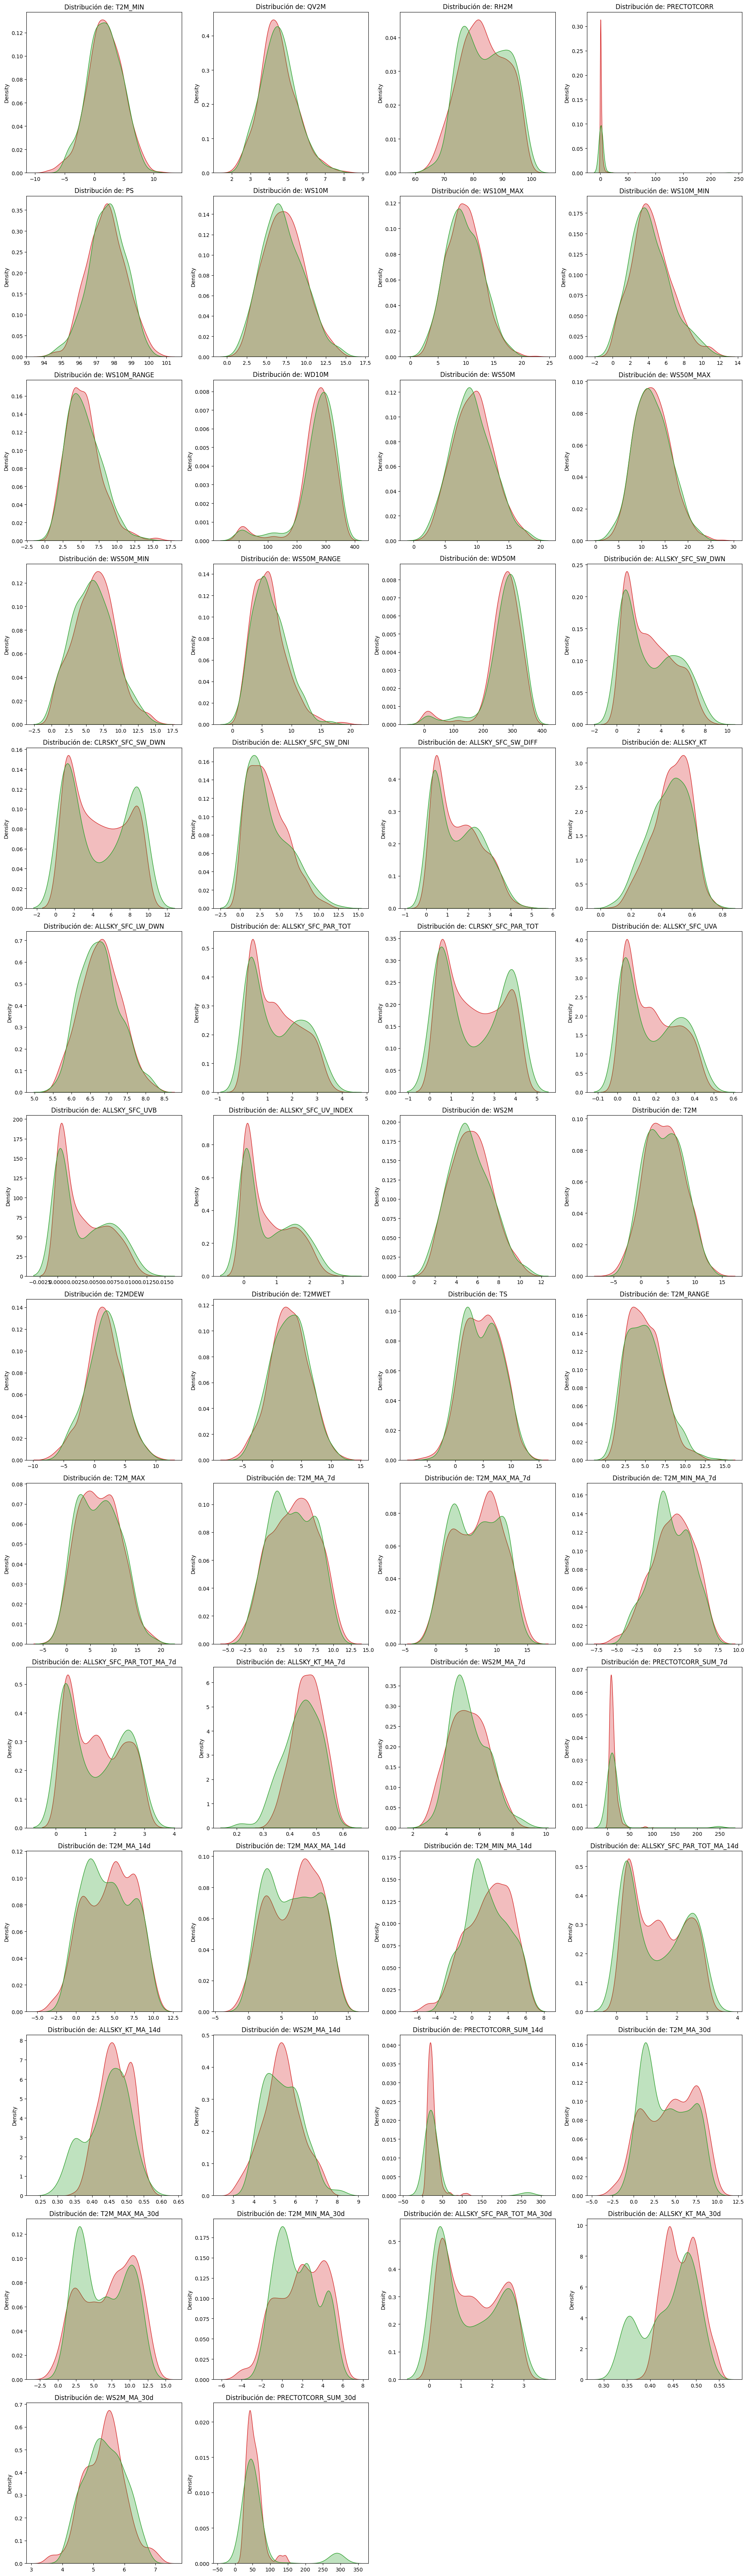

In [10]:
cols = 4
filas = math.ceil(len(features_list) / cols)

print("Generando grid de Gráficos de Densidad...")
fig, axs = plt.subplots(filas, cols, figsize=(20, 5 * filas))
axs = axs.flatten()

handles, labels = None, None 

for i, feature in enumerate(features_list):
    ax = axs[i]
    sns.kdeplot(
        data=df_unido, 
        x=feature, 
        hue=target,
        fill=True, 
        common_norm=False, 
        palette=colores_target,
        alpha=0.3,
        ax=ax,
        legend=False
    )
    ax.set_title(f'Distribución de: {feature}')
    ax.set_xlabel(None)
    
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

for i in range(len(features_list), len(axs)):
    axs[i].axis('off')

if handles:
    fig.legend(
        handles, 
        labels, 
        loc='upper center',
        bbox_to_anchor=(0.5, 1.0),
        ncol=len(labels),         
        title="Clase"
    )

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Creación de los graficos boxplot de cada variable segun la peligrosidad de la toxina

Generando grid de boxplots...


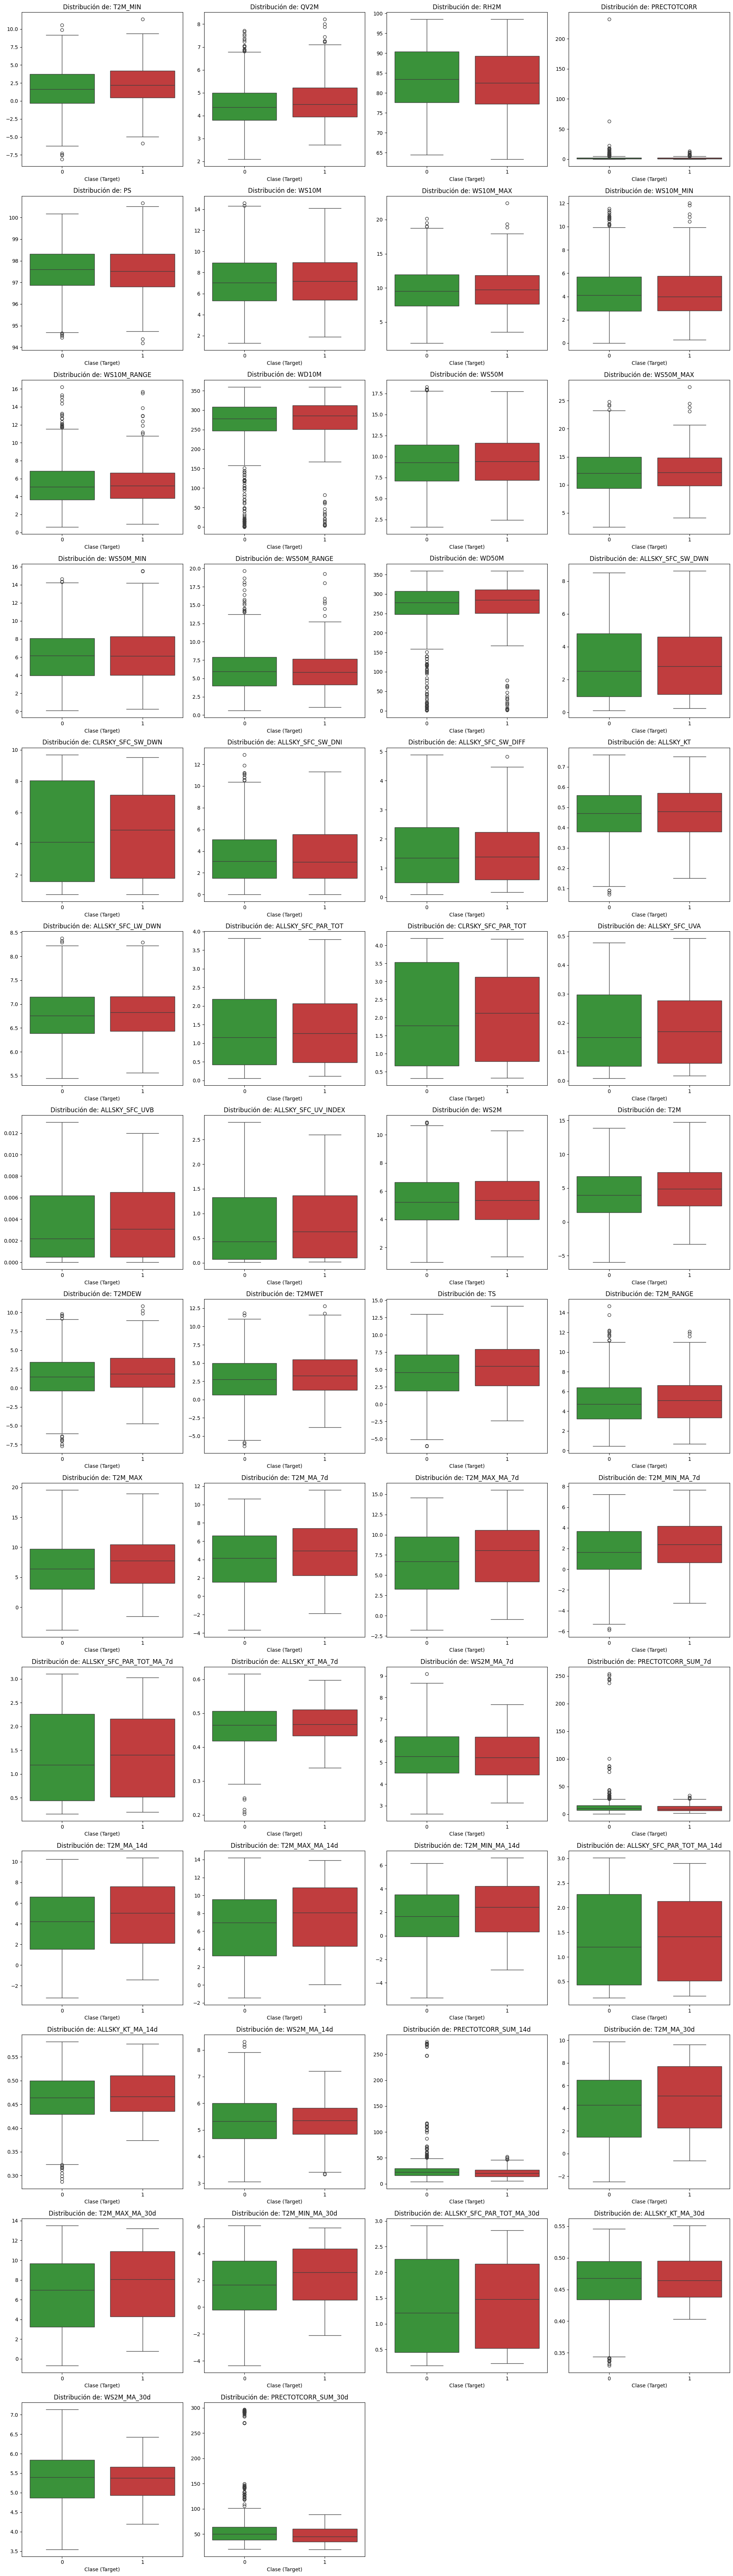

In [11]:
target = "Peligrosidad"

cols = 4
filas = math.ceil(len(features_list) / cols)

print("Generando grid de boxplots...")
fig, axs = plt.subplots(filas, cols, figsize=(20, 5 * filas))

axs = axs.flatten()

for i, feature in enumerate(features_list):
    ax = axs[i]
    sns.boxplot(
        data=df_unido,
        x=target, 
        y=feature,
        hue=target,
        legend=False, 
        ax=ax,
        palette=colores_target
    )
    ax.set_title(f'Distribución de: {feature}')
    ax.set_xlabel('Clase (Target)') 
    ax.set_ylabel(None) 

for i in range(len(features_list), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

Creación de los graficos de densidad de cada variable segun la peligrosidad de la toxina


Generando grid de Gráficos de Densidad...


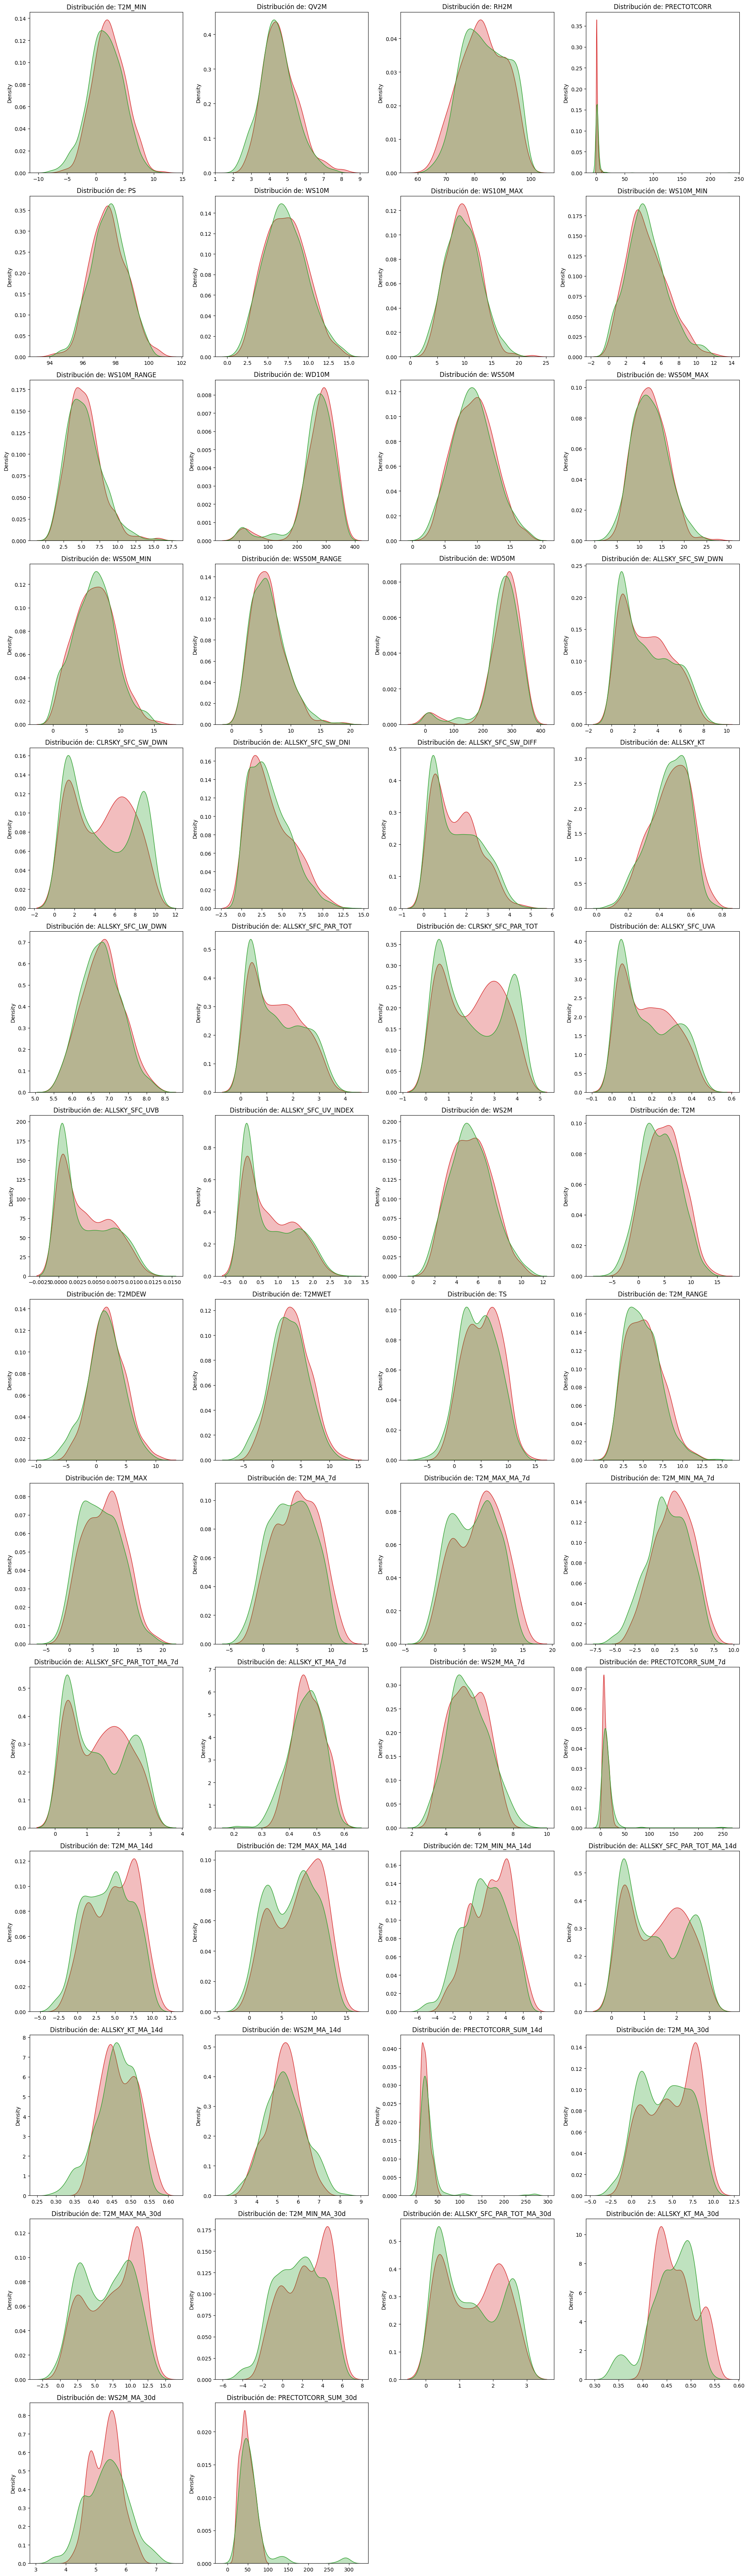

In [13]:
cols = 4
filas = math.ceil(len(features_list) / cols)

print("Generando grid de Gráficos de Densidad...")
fig, axs = plt.subplots(filas, cols, figsize=(20, 5 * filas))
axs = axs.flatten()

handles, labels = None, None

for i, feature in enumerate(features_list):
    ax = axs[i]
    sns.kdeplot(
        data=df_unido, 
        x=feature, 
        hue=target,
        fill=True, 
        common_norm=False, 
        palette=colores_target,
        alpha=0.3,
        ax=ax,
        legend=False  
    )
    ax.set_title(f'Distribución de: {feature}')
    ax.set_xlabel(None)
    
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

for i in range(len(features_list), len(axs)):
    axs[i].axis('off')

if handles:
    fig.legend(
        handles, 
        labels, 
        loc='upper center',       
        bbox_to_anchor=(0.5, 1.0),
        ncol=len(labels),         
        title="Clase"
    )

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()